<a href="https://colab.research.google.com/github/abhishek27vijayan/SUMMER_INTERN/blob/main/intern_n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
s=1
time=np.linspace(0,s,1000,endpoint=True)
time


array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

In [ ]:
nfrequency=200
namplitude=1
noise=namplitude*np.sin(2*np.pi*nfrequency*time)

In [ ]:
amplitude=15
frequency=10
phase=5
signal=amplitude*np.sin(2*np.pi*frequency*time+ phase)
signal1=signal+noise
signal1


array([-14.38386412, -13.13654302, -13.15065261, -13.92132807,
       -13.82136231, -12.35606075, -10.85057979, -10.61821574,
       -11.14537929, -10.80589053,  -9.11574081,  -7.40690697,
        -6.98740231,  -7.33469873,  -6.82345609,  -4.98010286,
        -3.14310059,  -2.6148308 ,  -2.86353737,  -2.26446279,
        -0.35415958,   1.52281972,   2.0701254 ,   1.82907524,
         2.42413953,   4.30898644,   6.13339075,   6.60745152,
         6.28239166,   6.78269245,   8.55258362,  10.2365743 ,
        10.55161041,  10.05913731,  10.38391291,  11.96103018,
        13.43009371,  13.5152414 ,  12.78839903,  12.87480174,
        14.20063699,  15.40088974,  15.20715325,  14.20200479,
        14.01126629,  15.05235618,  15.95582588,  15.46088459,
        14.16082636,  13.68206141,  14.43326566,  15.04063138,
        14.25103073,  12.66842527,  11.91970047,  12.40470225,
        12.74522426,  11.6957354 ,   9.87070348,   8.89726646,
         9.16624561,   9.29489198,   8.04510307,   6.04

In [ ]:
fig1=go.Figure(layout=dict(xaxis=dict(title="time"),yaxis=dict(title="amplitude")))
fig1.add_scatter(x=time,y=signal1)
fig1.update_layout(title='SIGNAL')
fig1.show()

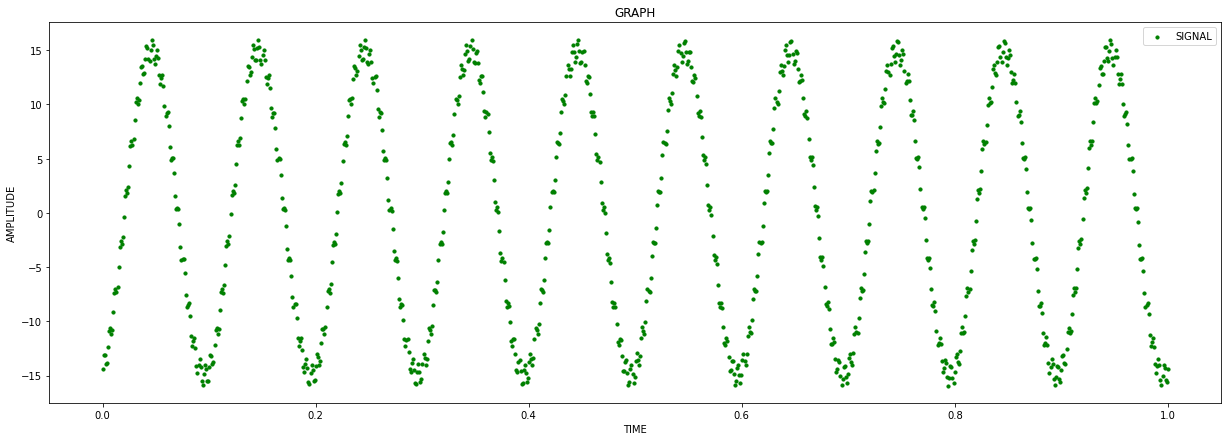

In [ ]:
plt.figure(figsize=(21,7))
plt.scatter(time,signal1,s=10,c='g',label="SIGNAL")
plt.title("GRAPH")
plt.xlabel("TIME")
plt.ylabel("AMPLITUDE")
plt.legend()
plt.show()

In [ ]:
trainx, testx = time[0:int(0.8*(len(time)))], time[int(0.8*(len(time))):]
trainy, testy = signal1[0:int(0.8*(len(signal1)))], signal1[int(0.8*(len(signal1))):]
train = np.array(list(zip(trainx,trainy)))
test = np.array(list(zip(testx,testy)))

In [ ]:
def create_dataset(n_X, look_back):
   dataX, dataY = [], []
   for i in range(len(n_X)-look_back):
      a = n_X[i:(i+look_back), ]
      dataX.append(a)
      dataY.append(n_X[i + look_back, ])
   return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainx,trainy = create_dataset(train, look_back)
testx,testy = create_dataset(test, look_back)
trainx = np.reshape(trainx, (trainx.shape[0], 1, 2))
testx = np.reshape(testx, (testx.shape[0], 1, 2))

In [ ]:
model = Sequential()
model.add(LSTM(512, return_sequences = True, input_shape = (trainx.shape[1], 2)))
model.add(LSTM(256,input_shape = (trainx.shape[1], 2)))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
model.fit(trainx, trainy, validation_data=(testx,testy),epochs=100) 
model.save_weights('LSTMBasic2.h5')

Epoch 1/100
25/25 [==============================] - 23s 92ms/step - loss: 44.2278 - accuracy: 0.9008 - val_loss: 8.1526 - val_accuracy: 0.9497
Epoch 2/100
25/25 [==============================] - 1s 31ms/step - loss: 4.1523 - accuracy: 0.9725 - val_loss: 2.2947 - val_accuracy: 0.9497
Epoch 3/100
25/25 [==============================] - 1s 31ms/step - loss: 1.3470 - accuracy: 0.9643 - val_loss: 1.1935 - val_accuracy: 0.9497
Epoch 4/100
25/25 [==============================] - 1s 30ms/step - loss: 0.8625 - accuracy: 0.9746 - val_loss: 0.9102 - val_accuracy: 0.9497
Epoch 5/100
25/25 [==============================] - 1s 30ms/step - loss: 0.7933 - accuracy: 0.9639 - val_loss: 0.7697 - val_accuracy: 0.9497
Epoch 6/100
25/25 [==============================] - 1s 30ms/step - loss: 0.6278 - accuracy: 0.9734 - val_loss: 0.7250 - val_accuracy: 0.9497
Epoch 7/100
25/25 [==============================] - 1s 31ms/step - loss: 0.5740 - accuracy: 0.9638 - val_loss: 0.7064 - val_accuracy: 0.9497
Epoc

In [ ]:
model.load_weights('LSTMBasic2.h5')

# Training data
predict = model.predict(trainx)

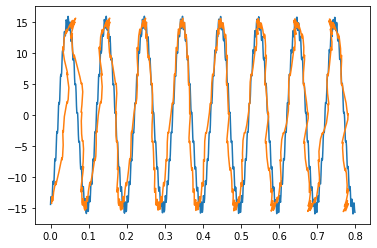

In [ ]:

plt.plot(trainx.reshape(799,2)[:,0:1], trainx.reshape(799,2)[:,1:2])
plt.plot(predict[:,0:1], predict[:,1:2])

In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy_score(testx, testy)

In [ ]:
# Testing data
predict = model.predict(testx)

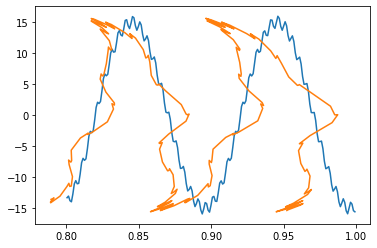

In [ ]:
plt.plot(testx.reshape(199,2)[:,0:1], testx.reshape(199,2)[:,1:2])
plt.plot(predict[:,0:1], predict[:,1:2])